In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from netam.framework import load_crepe
import netam.pretrained
from netam.common import heavy_chain_shim
from dnsmex.local import localify
from dnsmex.dasm_viz import PLOT_AA_ORDER, selection_df_from_factors, dms_style_heatmap, dotsize_df_from_sequence, neutral_codon_probs_from_sequence

figures_dir = localify("FIGURES_DIR")

2025-05-05 11:43:16.418442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Using mean value from v1rodriguez
BRANCH_LENGTH = 0.026
model_name = "dasm_1m-v1jaffeCC+v1tangCC-joint"

crepe_prefix = localify(f"DASM_TRAINED_MODELS_DIR/{model_name}")
# crepe_prefix = "/home/wdumm/dnsm-netam-proj/dnsm-experiments-1/dasm-train/trained_models/dasm_1m-v1jaffeCC+v1tangCC-joint"

crepe = load_crepe(crepe_prefix)

neutral_crepe = netam.pretrained.load(crepe.model.neutral_model_name)
crepe = heavy_chain_shim(crepe)

Loading model ThriftyHumV0.2-59
Using cached models: /home/wdumm/dnsm-netam-proj-runner1/netam/netam/_pretrained/thrifty-0.2.0.zip


Text(0.5, 1.0, 'DASM Predictions')

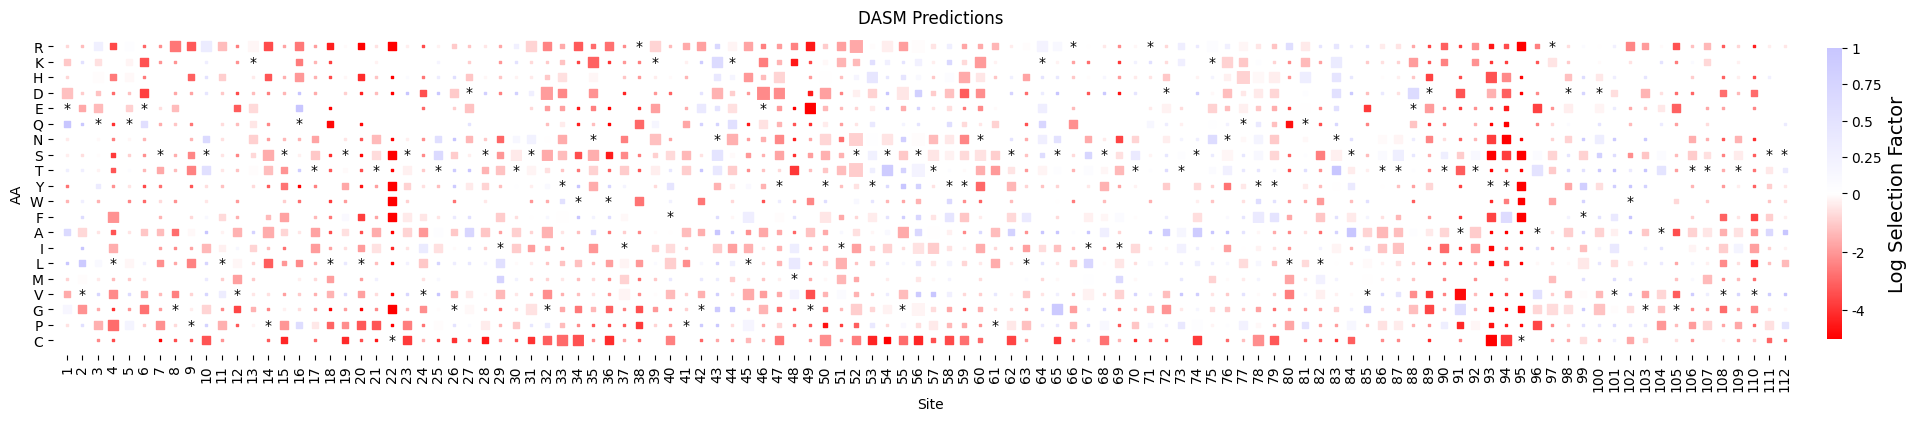

In [3]:
# igh_6mtx_with_constant = "QVQLQESGPGLVKSSETLSLSCTVSGASISNFYWSWVRQPPGKGLEWMGSIYYTGTITYNPSLKSRLTMSVDTSKNQFSLKLNSVTAADTAVYSCAGLDRFNWNDEGDCWGQGTLVTVFSASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCDK"
# igh_6mtx = igh_6mtx_with_constant[:118]

igh_naive = "EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS"
igh_naive_nt = 'GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCA'

# selection_factors = crepe.model.selection_factors_of_aa_str([igh_naive, ""])[0].detach().log().cpu().numpy()
log_selection_factors = crepe([igh_naive])[0].log()
dasm_selection_factors_df = selection_df_from_factors(log_selection_factors)


dms_dotsize_overlay = dotsize_df_from_sequence(igh_naive_nt, neutral_crepe, BRANCH_LENGTH)
fig = dms_style_heatmap(dasm_selection_factors_df, igh_naive, normalize=True, dotsize_overlay=dms_dotsize_overlay)
fig.get_axes()[0].set_title("DASM Predictions")

## EPAM ESM Predictions

Text(0.5, 1.0, 'ESM Predictions')

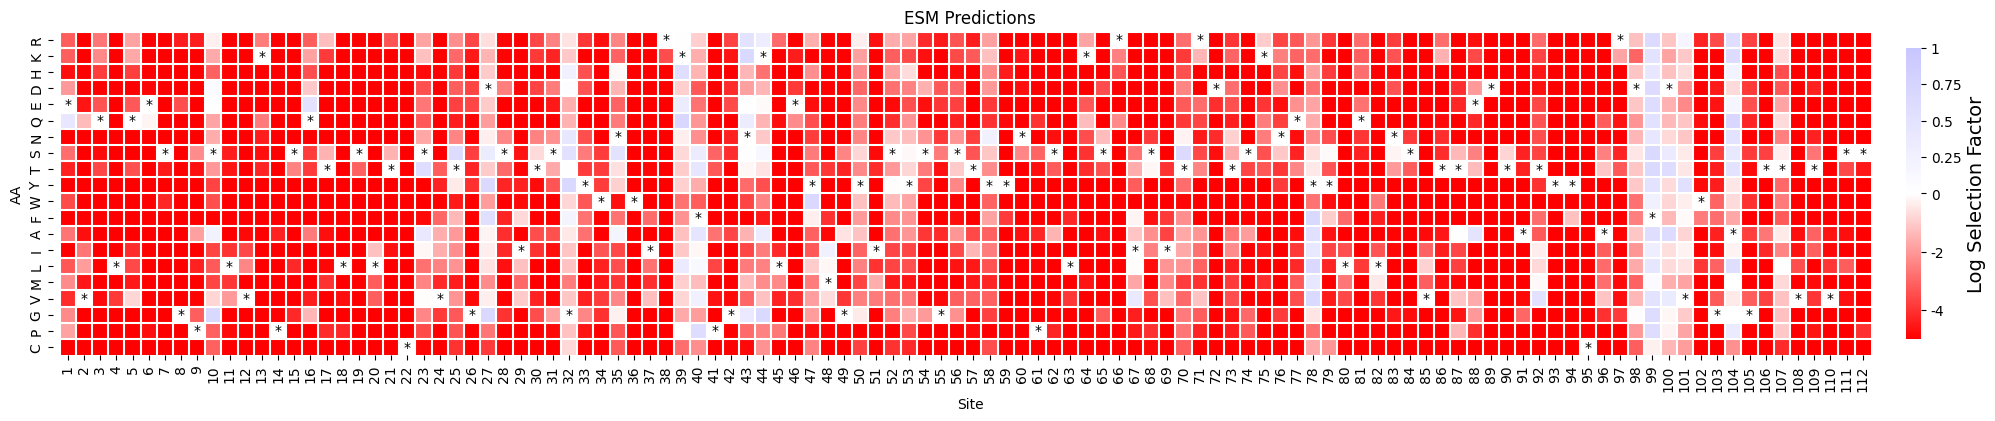

In [4]:

epam_data_path = localify('MISC/replay_igh_naive_esm1_sf.csv')
epam_df = pd.read_csv(epam_data_path)
hc_epam_df = epam_df
hc_plot_epam_df = pd.DataFrame(index=PLOT_AA_ORDER, columns=hc_epam_df['site'].drop_duplicates())
for i,row in hc_epam_df.iterrows():
    aa = row['mutant']
    aa_pos = row['site']
    hc_plot_epam_df.loc[aa, aa_pos] = np.log(row['sf_max2'])
hc_plot_epam_df = hc_plot_epam_df.astype('float')
# hc_plot_epam_df = hc_plot_epam_df.fillna(0)

fig = dms_style_heatmap(hc_plot_epam_df, aa_string=igh_naive)
fig.get_axes()[0].set_title("ESM Predictions")

## Ablang2 Predictions

Text(0.5, 1.0, 'ESM Predictions')

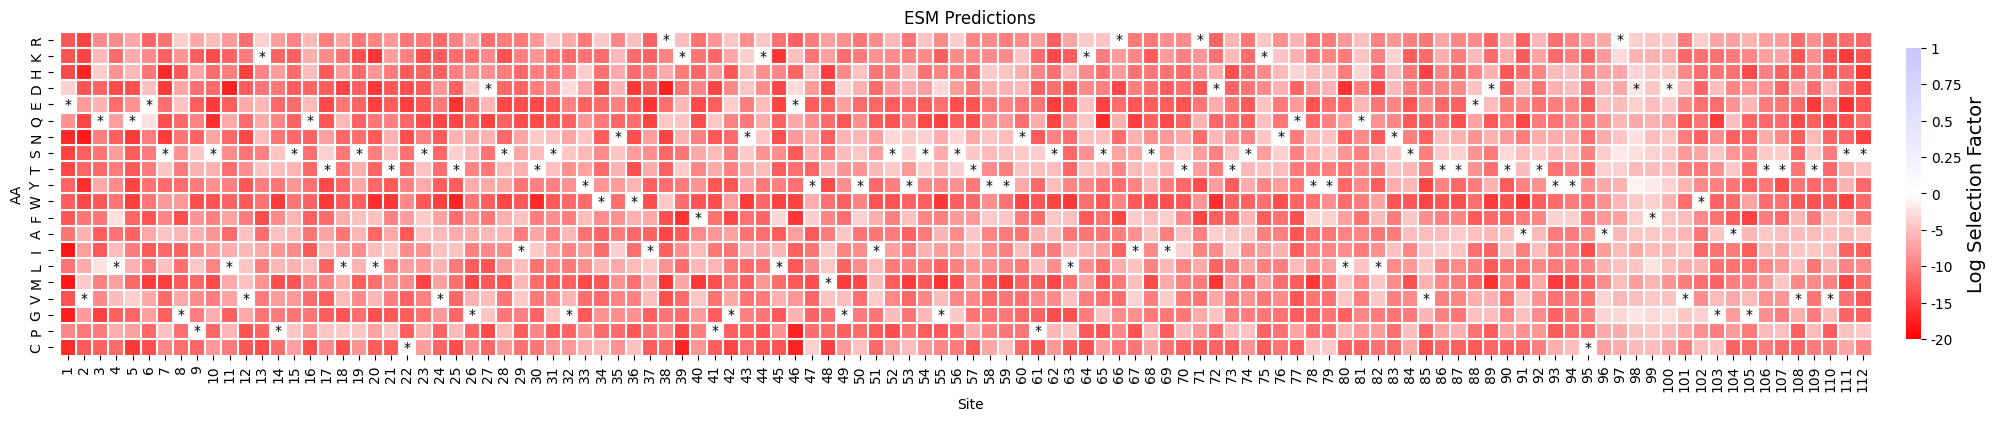

In [5]:
ablang_data_path = localify('MISC/replay_igh_naive_ablang.csv')
ablang_df = pd.read_csv(ablang_data_path)
hc_ablang_df = ablang_df
hc_plot_ablang_df = pd.DataFrame(index=PLOT_AA_ORDER, columns=hc_ablang_df['site'].drop_duplicates())
for i,row in hc_ablang_df.iterrows():
    aa = row['mutant']
    aa_pos = row['site']
    hc_plot_ablang_df.loc[aa, aa_pos] = np.log(row['ablang2_mask'])
hc_plot_ablang_df = hc_plot_ablang_df.astype('float')
# hc_plot_ablang_df = hc_plot_ablang_df.fillna(0)

fig = dms_style_heatmap(hc_plot_ablang_df, aa_string=igh_naive, cb_min_center_max=(-20, 0, 1))
fig.get_axes()[0].set_title("ESM Predictions")

## DMS Values

Text(0.5, 1.0, 'DMS Values')

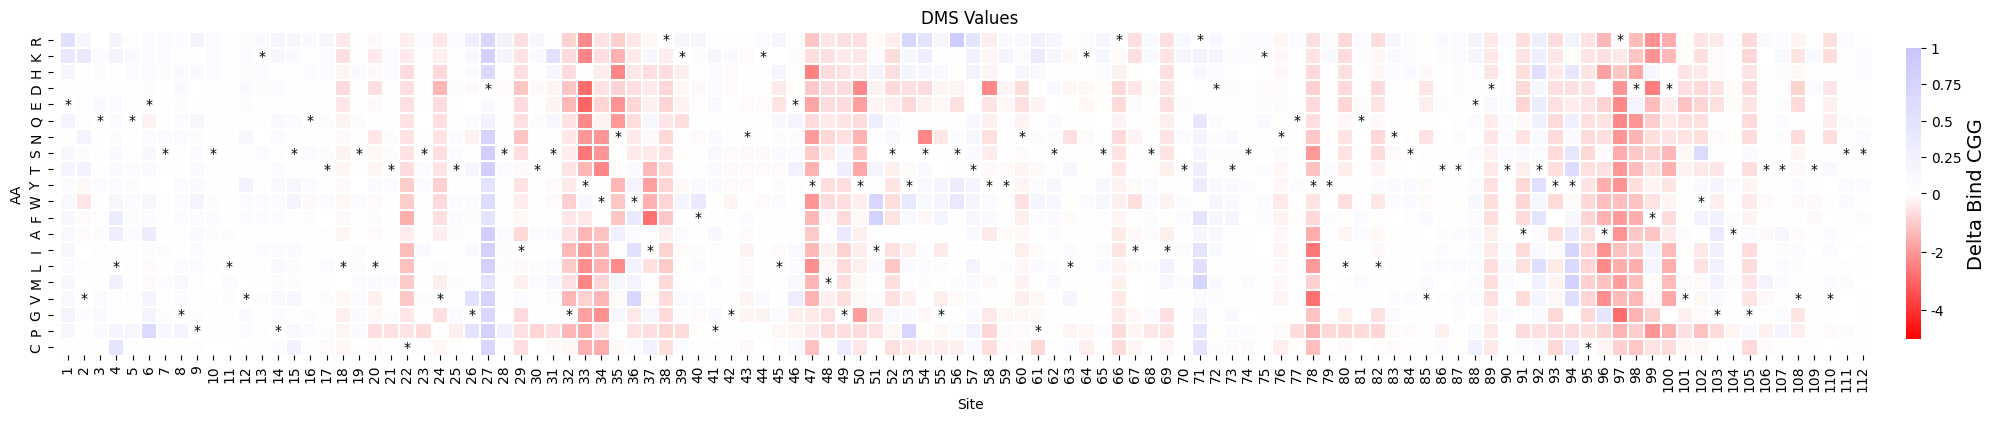

In [6]:
dms_url = 'https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/4def6e0f4c69d228c42a5736742ec6cfedbef151/tite-seq-modeling/output/final_variant_scores.csv'
dms_df = pd.read_csv(dms_url)

# This code is from Kevin:
hc_dms_df = dms_df[dms_df['chain']=='H']
hc_plot_dms_df = pd.DataFrame(index=PLOT_AA_ORDER, columns=hc_dms_df['position'].drop_duplicates())
for i,row in hc_dms_df.iterrows():
    aa = row['mutant']
    aa_pos = row['position']
    hc_plot_dms_df.loc[aa, aa_pos] = row['delta_bind_CGG']
hc_plot_dms_df = hc_plot_dms_df.astype('float')
hc_plot_dms_df = hc_plot_dms_df.fillna(0)

# hc_plot_dms_df = np.exp(hc_plot_dms_df)
fig = dms_style_heatmap(hc_plot_dms_df, aa_string=igh_naive, colorbar_label="Delta Bind CGG")
fig.get_axes()[0].set_title("DMS Values")

## DMS Delta Expression

Text(0.5, 1.0, 'DMS Delta Expression')

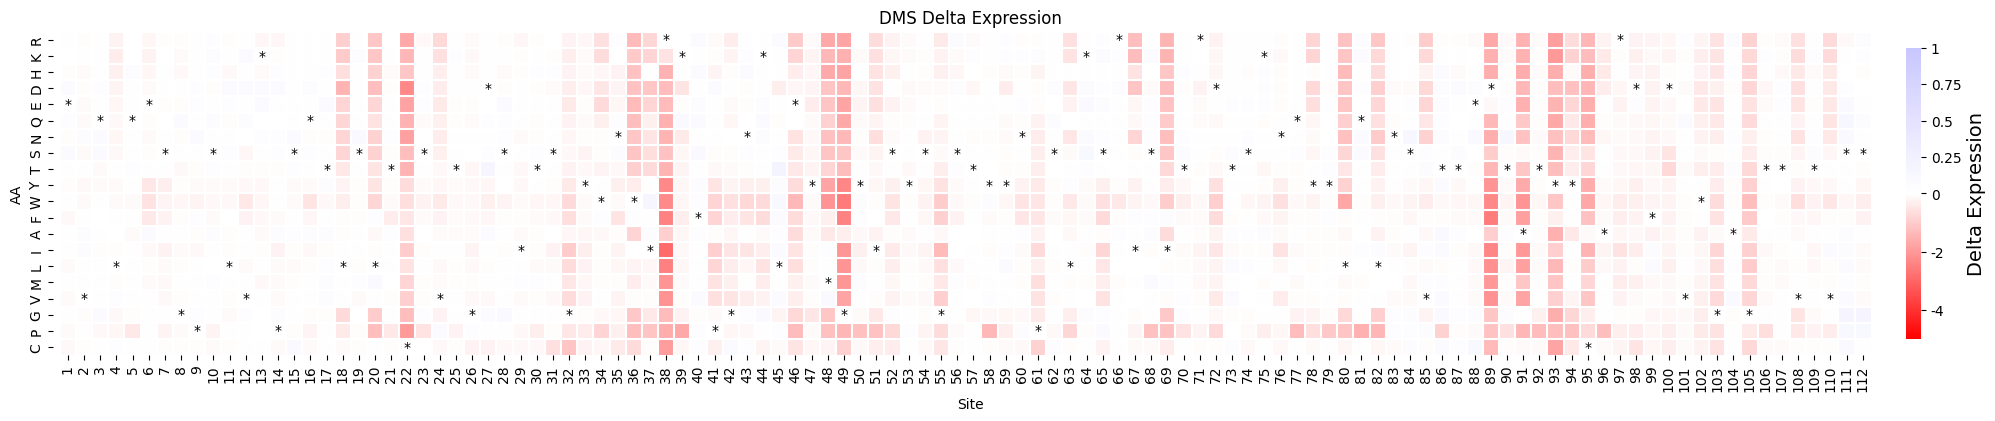

In [7]:

hc_plot_dms_expression_df = pd.DataFrame(index=PLOT_AA_ORDER, columns=hc_dms_df['position'].drop_duplicates())
for i,row in hc_dms_df.iterrows():
    aa = row['mutant']
    aa_pos = row['position']
    hc_plot_dms_expression_df.loc[aa, aa_pos] = row['delta_expr']
hc_plot_dms_expression_df = hc_plot_dms_expression_df.astype('float')
hc_plot_dms_expression_df = hc_plot_dms_expression_df.fillna(0)

# hc_plot_dms_expression_df = np.exp(hc_plot_dms_expression_df)
fig = dms_style_heatmap(hc_plot_dms_expression_df, aa_string=igh_naive, colorbar_label="Delta Expression")
fig.get_axes()[0].set_title("DMS Delta Expression")

## Stacked

Text(0.5, 1.0, 'Ablang2 Predictions (modified color scale)')

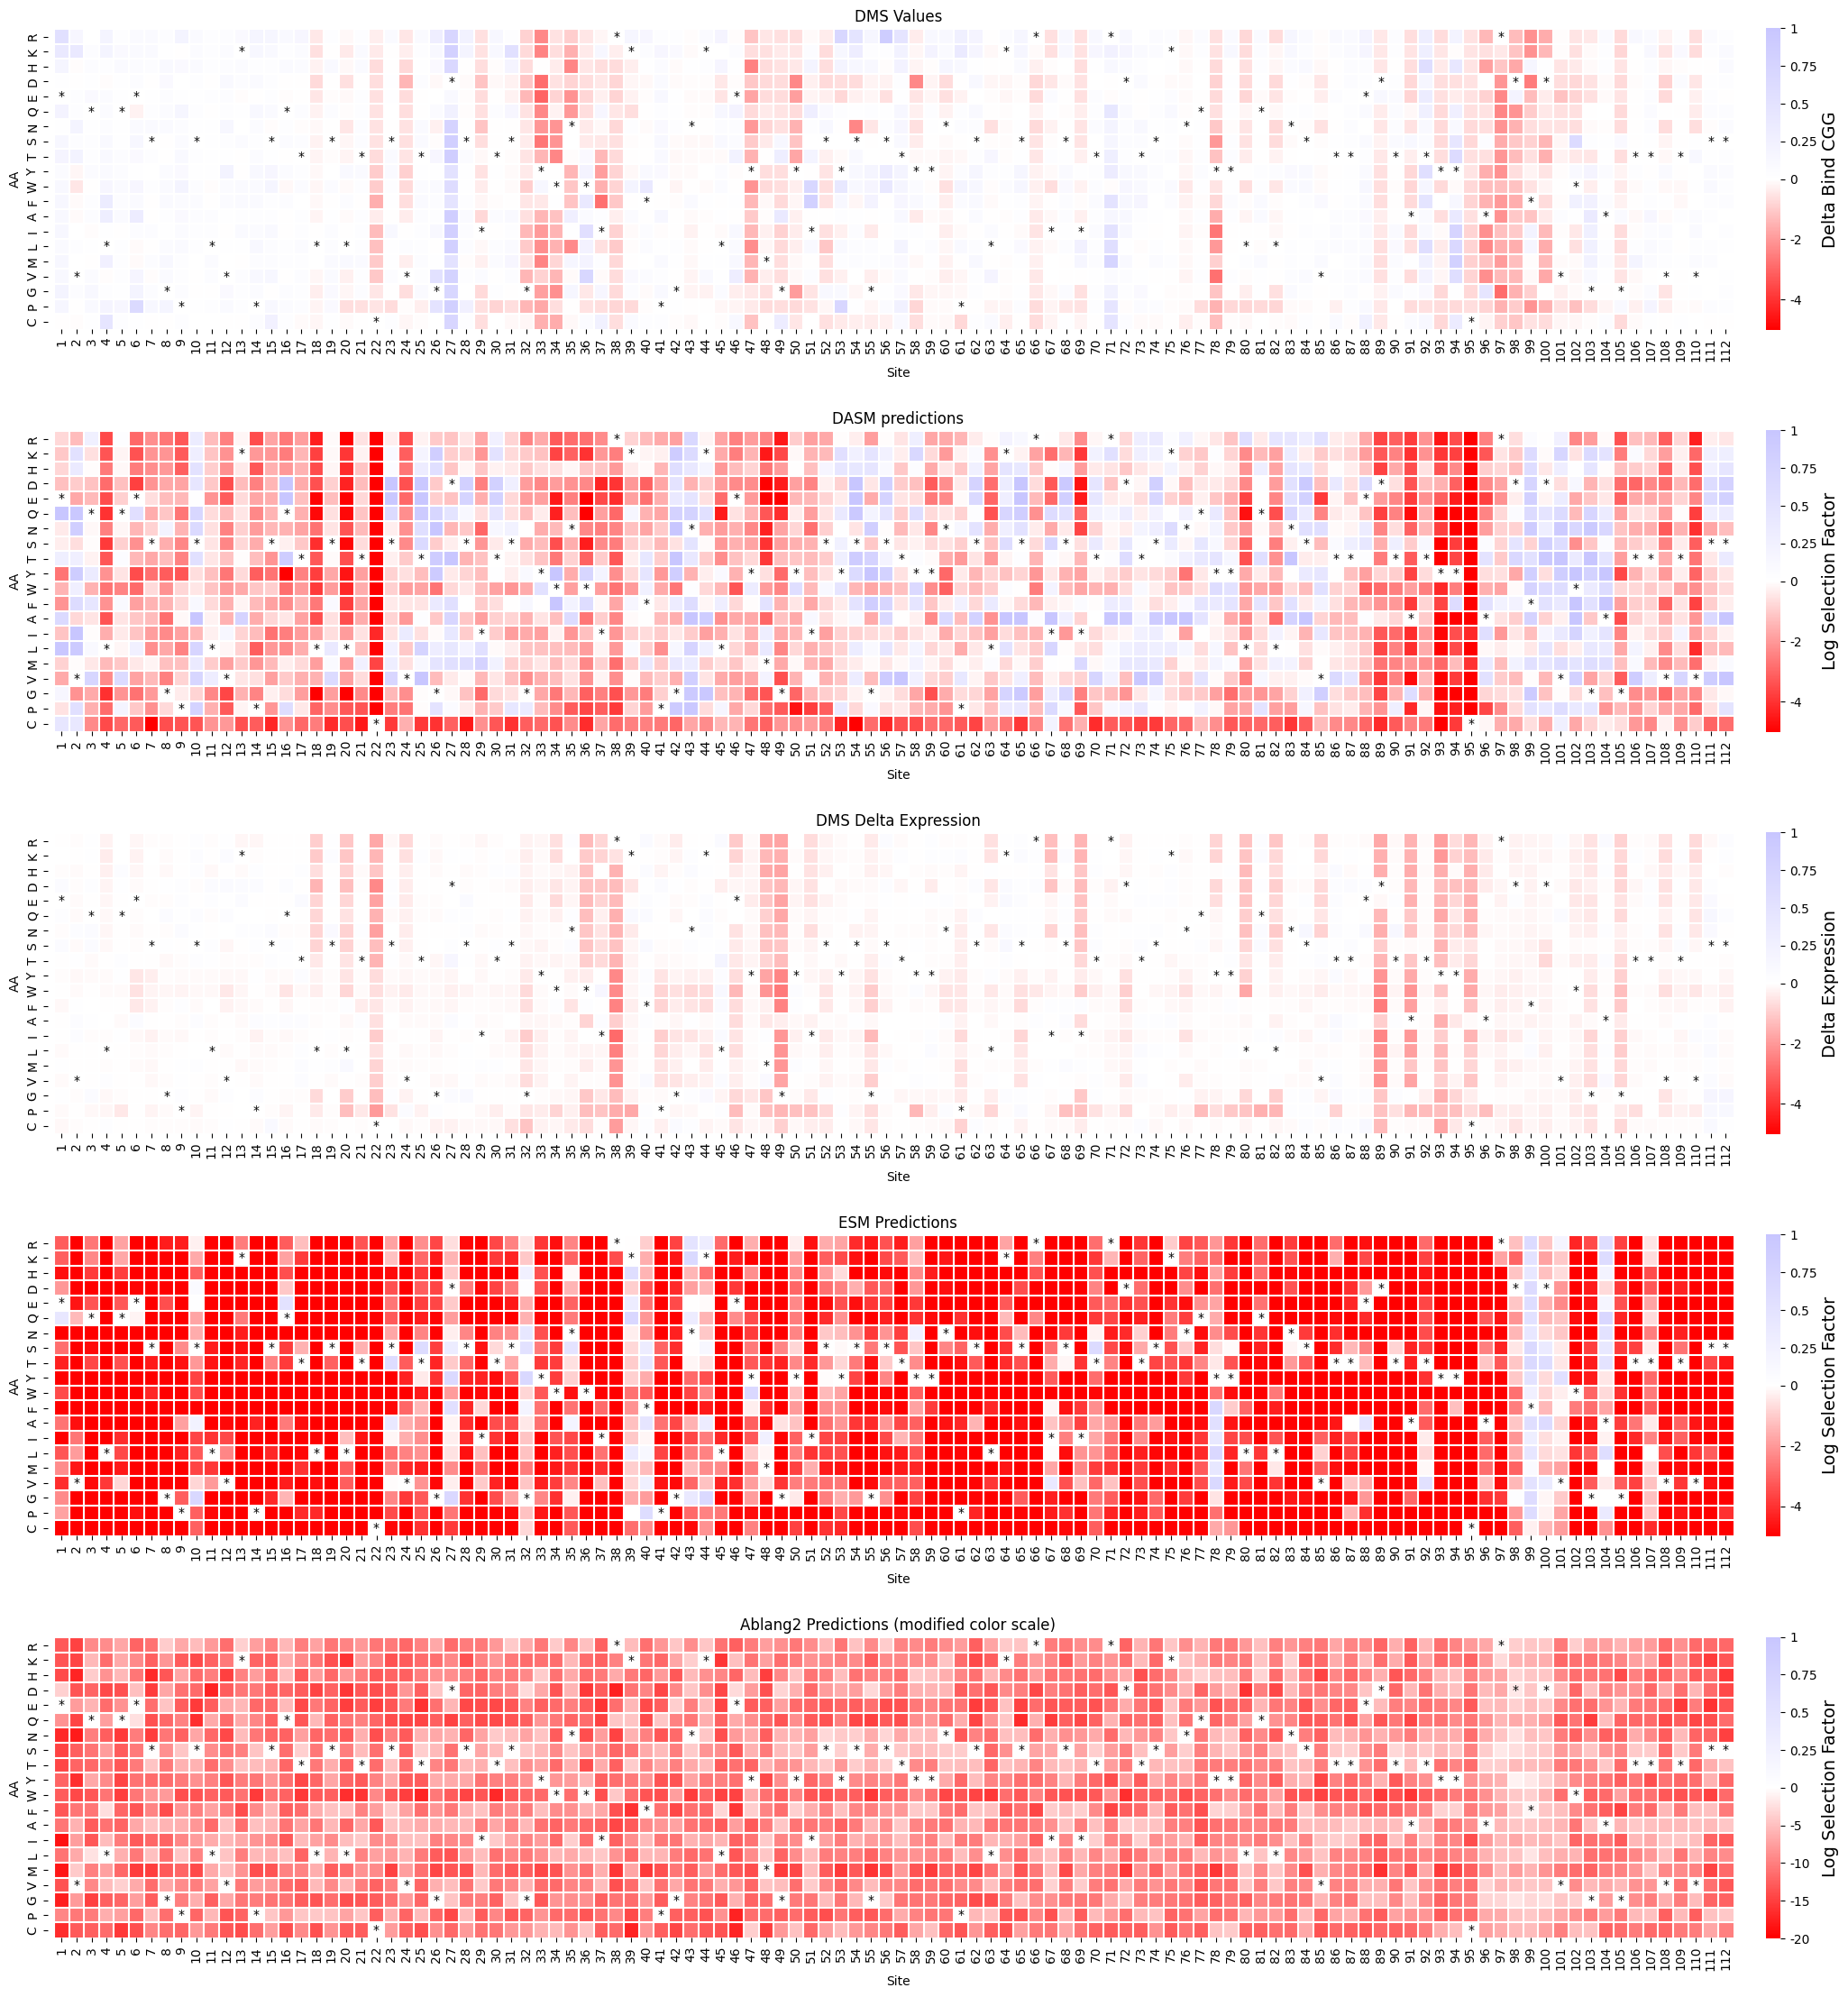

In [ ]:
pscale_factor = 0.7
fig, axs = plt.subplots(
    5,1,
    figsize=(0.32 * len(igh_naive) * pscale_factor, 5 * 8 * pscale_factor)
)

dms_style_heatmap(hc_plot_dms_df, aa_string=igh_naive, colorbar_label="Delta Bind CGG", ax=axs[0])
axs[0].set_title("DMS Values")
dms_style_heatmap(dasm_selection_factors_df, igh_naive, normalize=True, ax=axs[1])
axs[1].set_title("DASM predictions")
dms_style_heatmap(hc_plot_dms_expression_df, aa_string=igh_naive, colorbar_label="Delta Expression", ax=axs[2])
axs[2].set_title("DMS Delta Expression")
dms_style_heatmap(hc_plot_epam_df, aa_string=igh_naive, ax=axs[3])
axs[3].set_title("ESM Predictions")
dms_style_heatmap(hc_plot_ablang_df, aa_string=igh_naive, cb_min_center_max=(-20, 0, 1), ax=axs[4])
axs[4].set_title("Ablang2 Predictions (modified color scale)")